# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lyonard Gemilang Putra Merdeka Gustiansyah
- **Email:** lyonardgemilang@gmail.com
- **ID Dicoding:** lyonardgemilang

## Menentukan Pertanyaan Bisnis

- Musim (season) manakah yang paling banyak pengguna menyewa sepeda?
- Bagaimana performa total pengguna (cnt) dari tahun 2011 sampai 2012?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data (Day and Hour)

In [4]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

In [5]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data (Day)

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari informasi data di atas, tidak ada masalah pada jumlah data. Namun, dteday di sini bertipe data objek. Akan lebih baik apabila dteday bertipe data datetime.

In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dari informasi yang dihasilkan kode di atas, tidak terlihat inaccurate value ataupun yang lainnya. Data ini masih terlihat normal.

In [9]:
df_day.duplicated().sum()

np.int64(0)

Tidak ada data duplikat pada dataset day.csv ini.

In [10]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada data null pada dataset day.csv ini.

In [11]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada dataset day.csv ini.

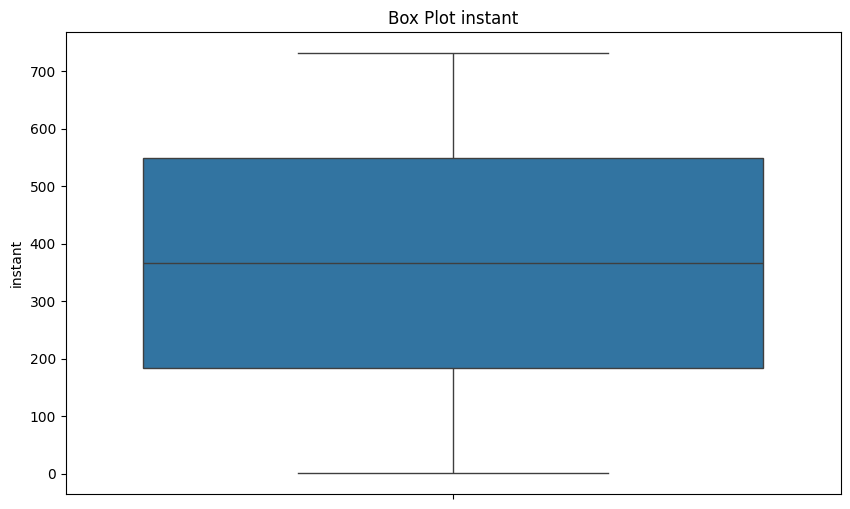

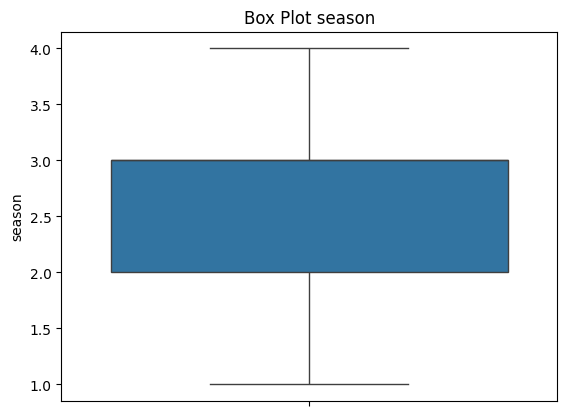

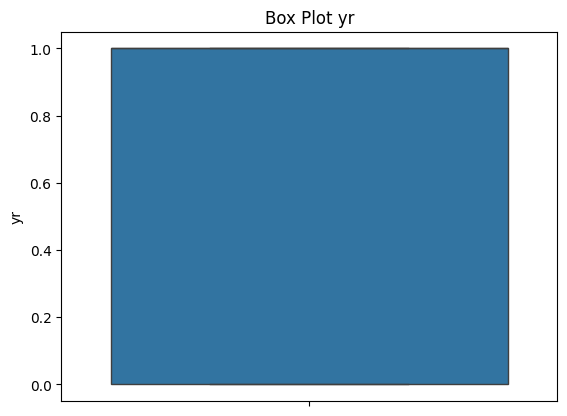

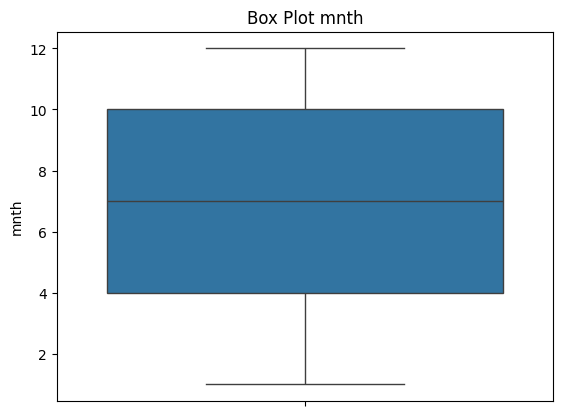

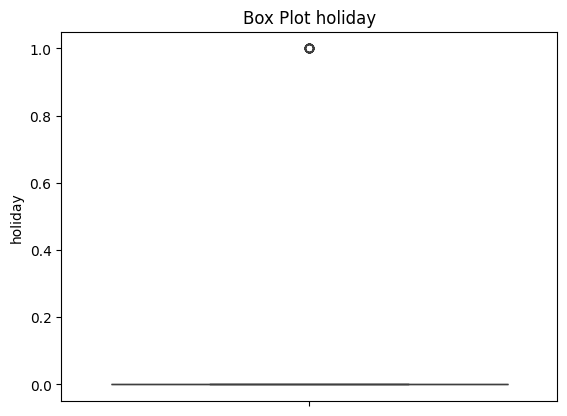

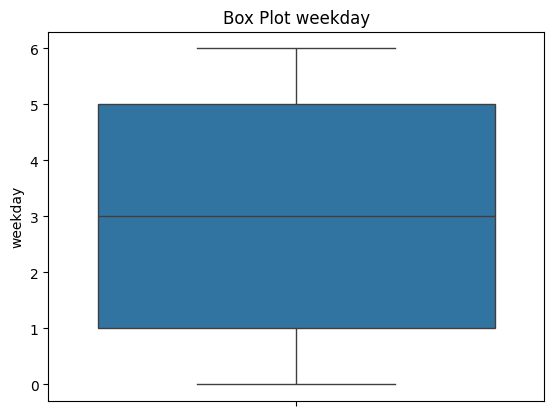

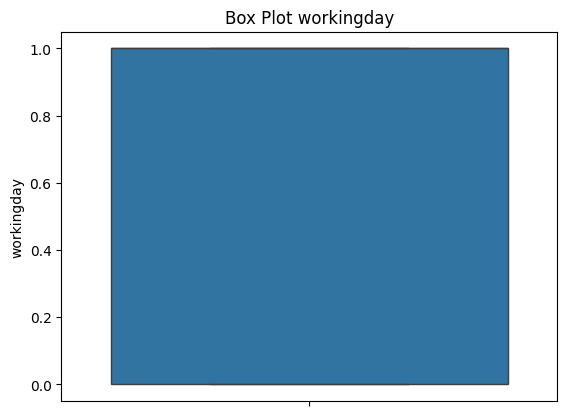

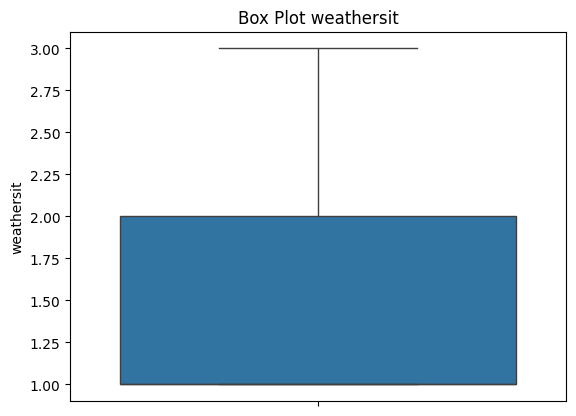

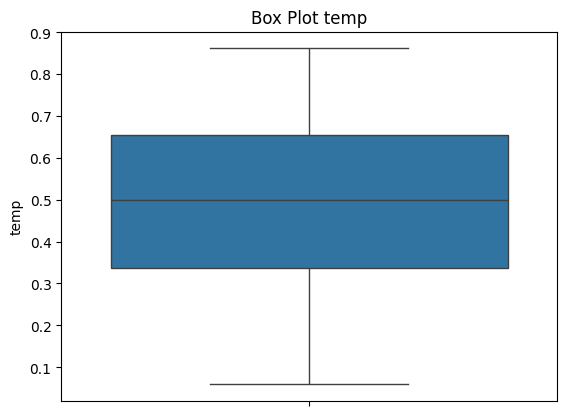

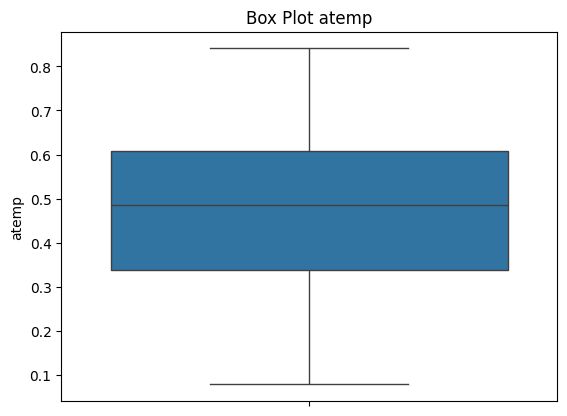

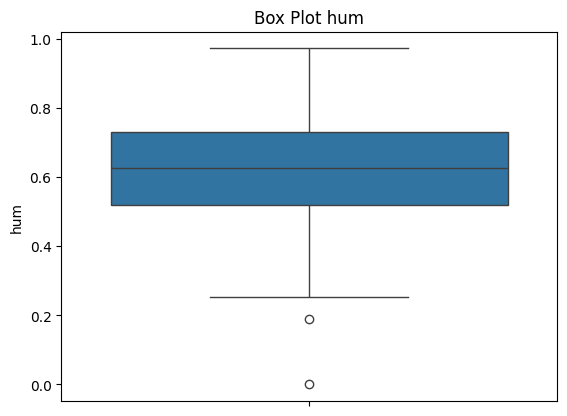

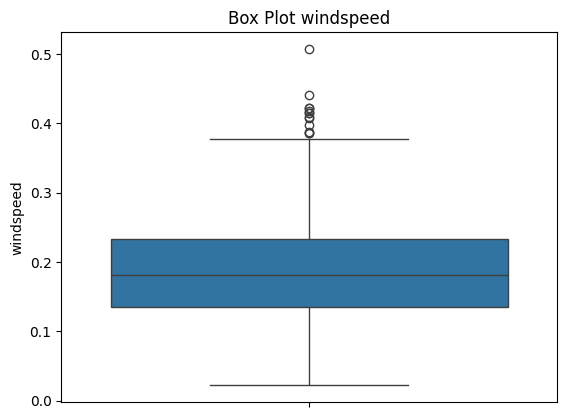

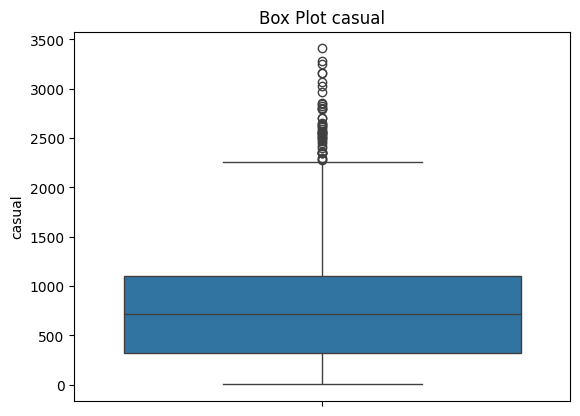

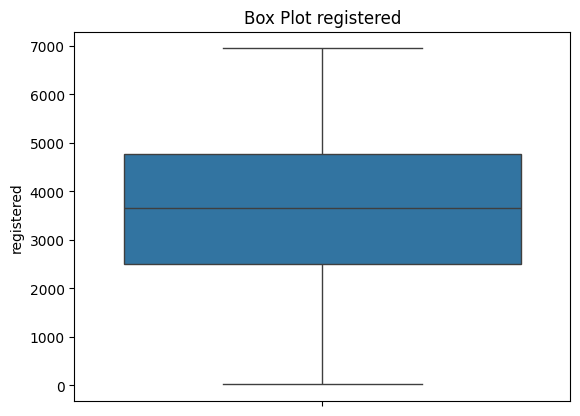

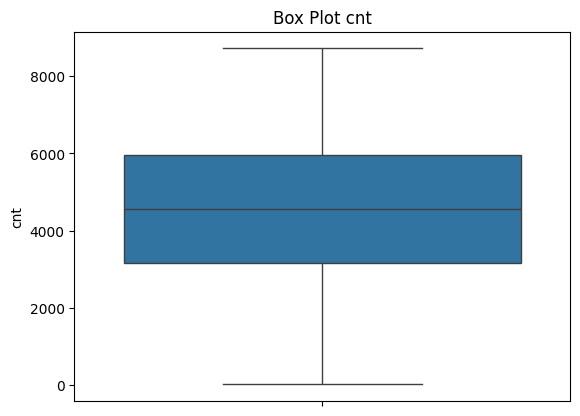

In [12]:
plt.figure(figsize=(10, 6))
for column in df_day.columns:
    if df_day[column].dtype != 'object':
        sns.boxplot(y=pd.to_numeric(df_day[column]))
        plt.title(f'Box Plot {column}')
        plt.ylabel(column)
        plt.show()

Dari box plot yang ditampilkan ternyata terdapat outliers pada kolom hum, windspeed, dan casual. Untuk kolom holiday tidak muncul box sama sekali, sedangkan kolom lainnya yang hanya memiliki 2 nilai juga seperti yr dan workingday tampil box. Hal tersebut dikarenakan distribusi data pada kolom holiday sangat tidak seimbang. Kolom holiday lebih dominan bernilai 0 dibandingkan 1. Nilai 1 pada kolom tersebut hanya muncul beberapa kali saja.

In [13]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [14]:
df_day.iloc[148]

instant              149
dteday        2011-05-29
season                 2
yr                     0
mnth                   5
holiday                0
weekday                0
workingday             0
weathersit             1
temp              0.6675
atemp            0.61555
hum              0.81875
windspeed       0.213938
casual              2355
registered          2433
cnt                 4788
Name: 148, dtype: object

#### Pengecekan nilai 0 pada kolom temp, atemp, hum, windspeed (Day)

In [15]:
nilai_nol_temp_d = df_day[df_day['temp'] == 0]
nilai_nol_temp_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Kode di atas digunakan untuk mencari data temp yang bernilai 0. Tidak ada data temp yang bernilai 0 pada dataset day.csv ini.

In [16]:
nilai_nol_atemp_d = df_day[df_day['atemp'] == 0]
nilai_nol_atemp_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Kode di atas digunakan untuk mencari data atemp yang bernilai 0. Tidak ada data atemp yang bernilai 0 pada dataset day.csv ini.

In [17]:
nilai_nol_hum_d = df_day[df_day['hum'] == 0]
nilai_nol_hum_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


Kode di atas digunakan untuk mencari data hum yang bernilai 0. Ternyata terdapat 1 data hum yang bernilai 0 pada dataset day.csv ini.

In [18]:
nilai_nol_wspeed_d = df_day[df_day['windspeed'] == 0]
nilai_nol_wspeed_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Kode di atas digunakan untuk mencari data windspeed yang bernilai 0. Tidak ada data windspeed yang bernilai 0 pada dataset day.csv ini.

**Dicarinya nilai 0 pada keempat kolom tersebut dikarenakan di dunia nyata sangat tidak mungkin jika keempat fitur tersebut menyentuh angka 0. Angka 0 pada keempat kolom tersebut akan menandakan bahwa kondisi cuaca pada saat itu sangat ekstrim ataupun terjadi kesalahan pencatatan data** 

### Assessing Data (Hour)

Kode di atas digunakan untuk mencari data windspeed yang bernilai 0. Tidak ada data windspeed yang bernilai 0 pada dataset day.csv ini.

In [19]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari informasi yang ditampilkan, tidak terdapat keanehan pada jumlah data pada dataset ini. Sama seperti day.csv, hour.csv ini memiliki kolom dteday yang bertipe object. Akan lebih baik apabila diubah menjadi datetime.

In [20]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari informasi di atas, terdapat nilai 0 pada atenp dan hum. Ini terlihat tidak logis karena atemp dan humidity yang mencapai 0 itu sudah termasuk kondisi ekstrim.

In [21]:
df_hour.duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat pada hour.csv ini.

In [22]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat data null pada hour.csv ini.

In [23]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada hour.csv ini.

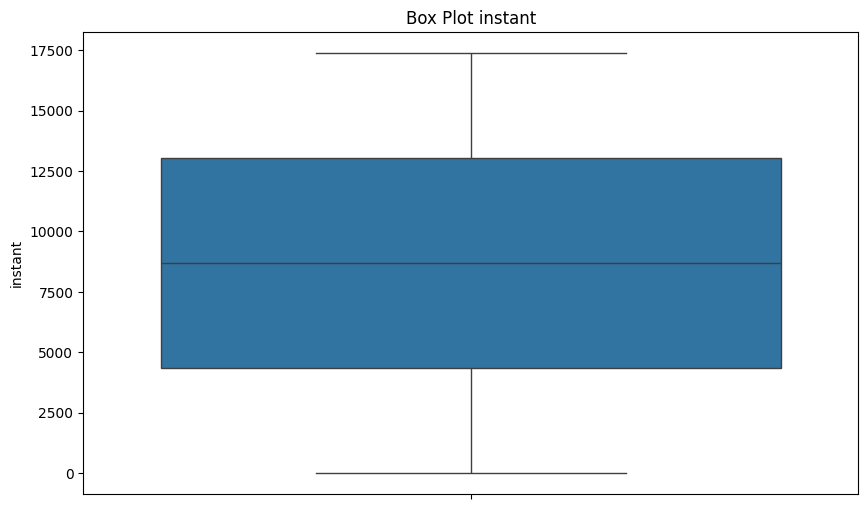

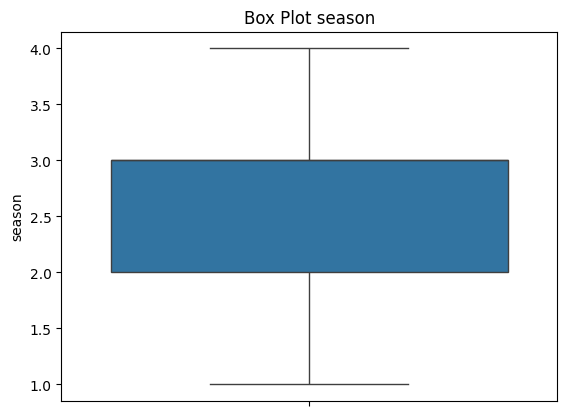

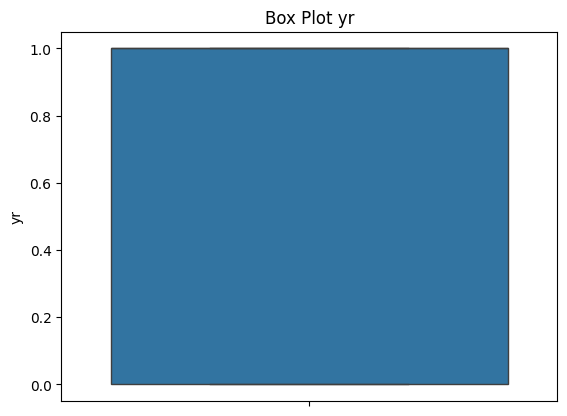

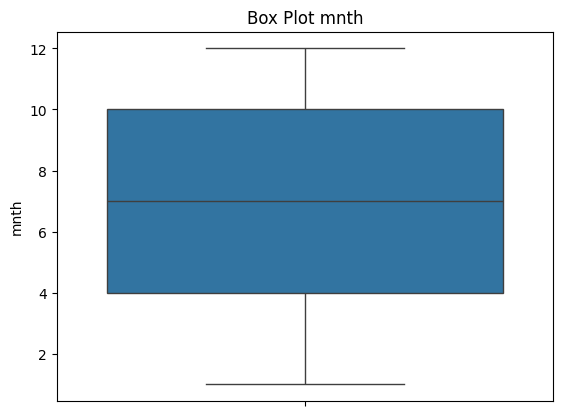

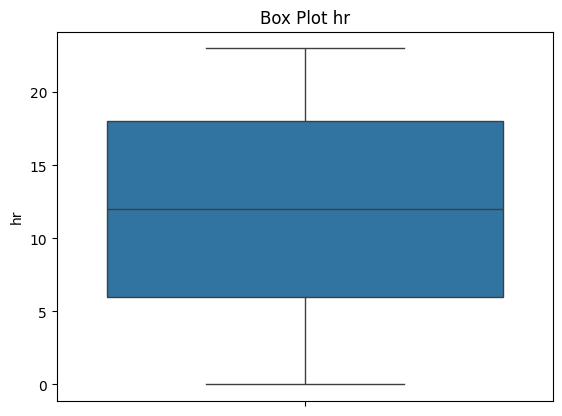

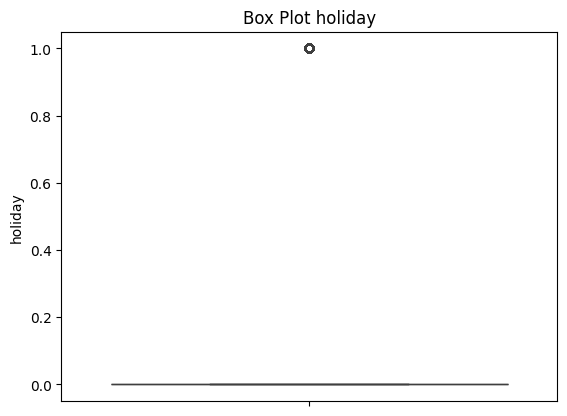

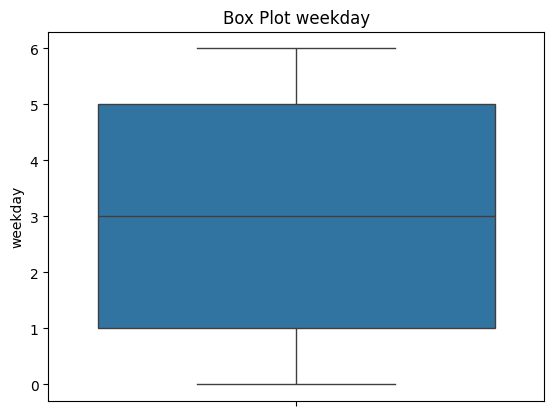

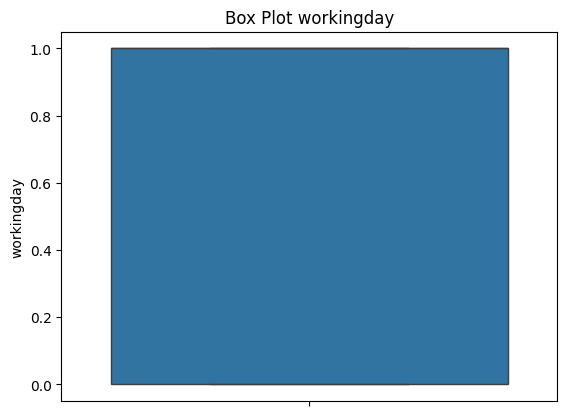

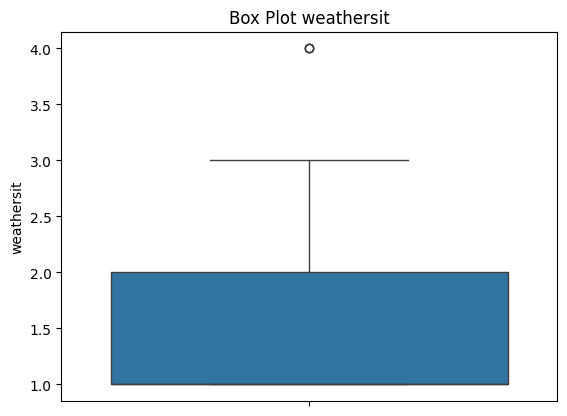

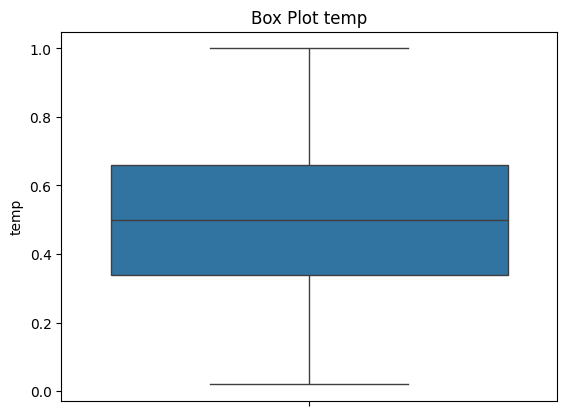

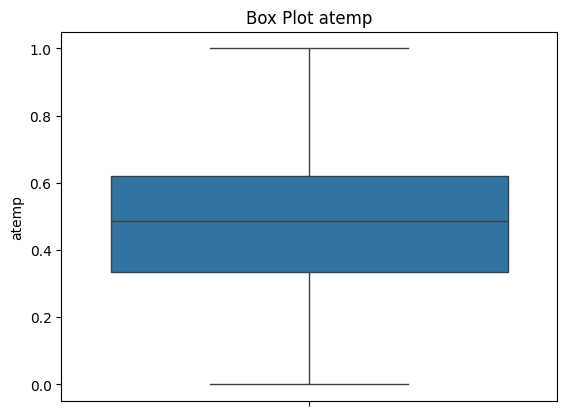

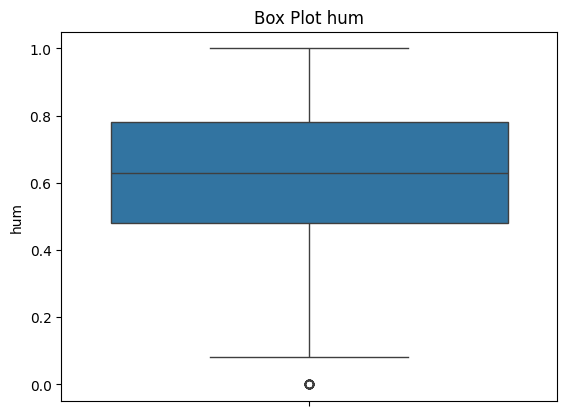

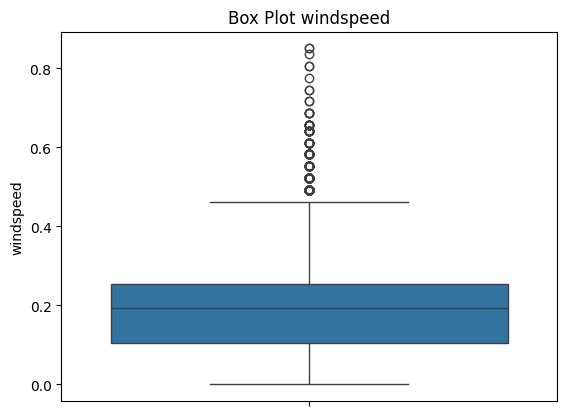

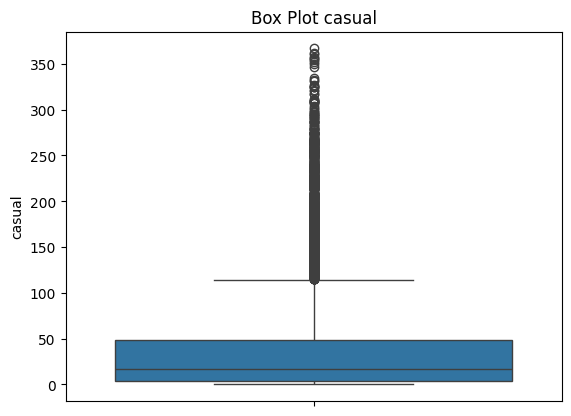

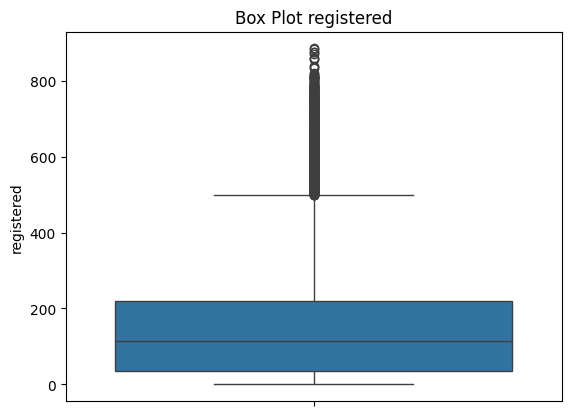

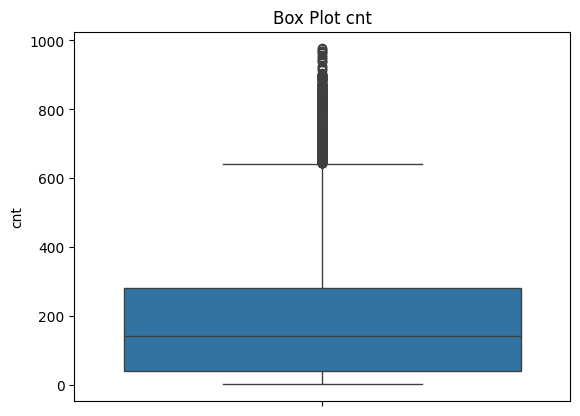

In [24]:
plt.figure(figsize=(10, 6))
for column in df_hour.columns:
    if df_hour[column].dtype != 'object':
        sns.boxplot(y=pd.to_numeric(df_hour[column]))
        plt.title(f'Box Plot {column}')
        plt.ylabel(column)
        plt.show()

Dari box plot yang ditampilkan ternyata terdapat outliers pada kolom weathersit, hum, windspeed, casual, registered, dan cnt.

In [25]:
nilai_nol_temp_h = df_hour[df_hour['temp'] == 0]
nilai_nol_temp_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Tidak terdapat data temp bernilai 0 pada hour.csv.

In [26]:
nilai_nol_atemp_h = df_hour[df_hour['atemp'] == 0]
nilai_nol_atemp_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
480,481,2011-01-22,1,0,1,1,0,6,0,2,0.04,0.0,0.41,0.3881,3,9,12
486,487,2011-01-22,1,0,1,8,0,6,0,1,0.02,0.0,0.44,0.3284,1,26,27


Terdapat 2 data atemp bernilai 0 pada hour.csv.

In [27]:
nilai_nol_hum_h = df_hour[df_hour['hum'] == 0]
nilai_nol_hum_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Terdapat 21 data hum yang bernilai 0 pada hour.csv.

### Cleaning Data

Keterangan Kolom:
- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
	+ 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	+ 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	+ 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	+ 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Cleaning Data (Day)

In [28]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

Kode di atas digunakan untuk mengubah tipe data dteday menjadi datetime.

In [29]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [30]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dapat dilihat dari informasi di atas, tipe data dteday sudah berubah dari object menjadi datetime.

In [31]:
mapping_season = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_day['season'] = df_day['season'].map(mapping_season)

mapping_yr = {0: '2011', 1: '2012'}
df_day['yr'] = df_day['yr'].map(mapping_yr)

mapping_holiday = {0: 'Holiday', 1: 'Not Holiday'}
df_day['holiday'] = df_day['holiday'].map(mapping_holiday)

mapping_workingday = {0: 'Holiday', 1: 'Weekday'}
df_day['workingday'] = df_day['workingday'].map(mapping_workingday)

mapping_weathersit = {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}
df_day['weathersit'] = df_day['weathersit'].map(mapping_weathersit)

Kode diatas digunakan untuk mapping agar memudahkan para pembaca untuk memahami data.

In [32]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,Holiday,0,Holiday,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,Holiday,1,Weekday,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Holiday,2,Weekday,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Holiday,3,Weekday,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


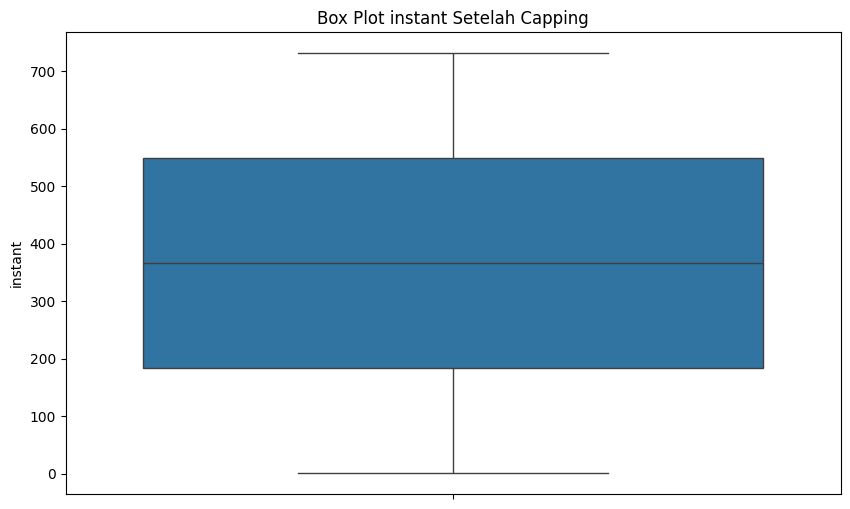

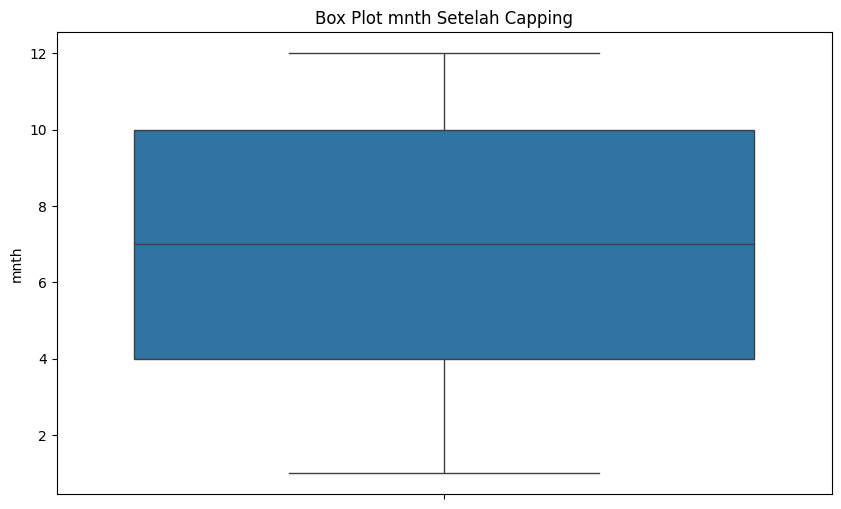

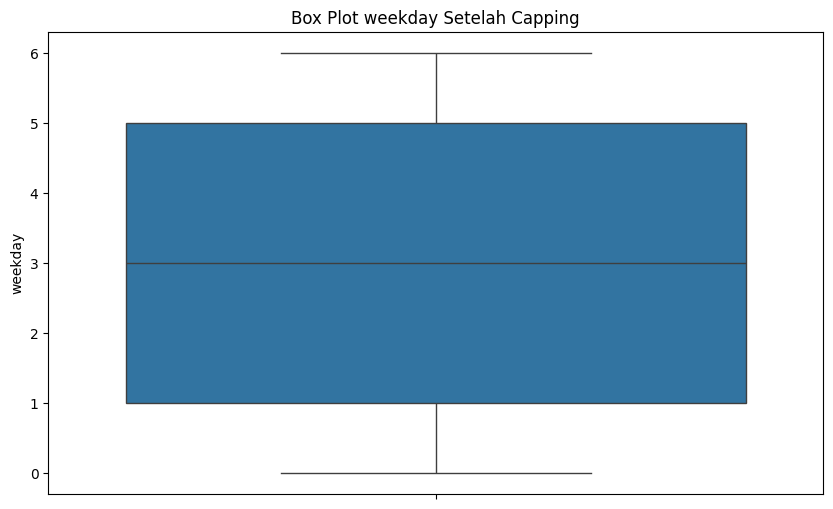

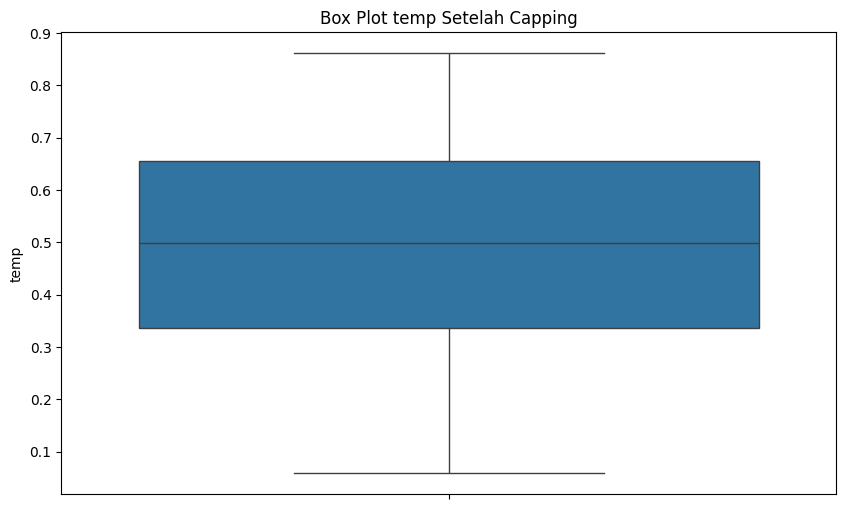

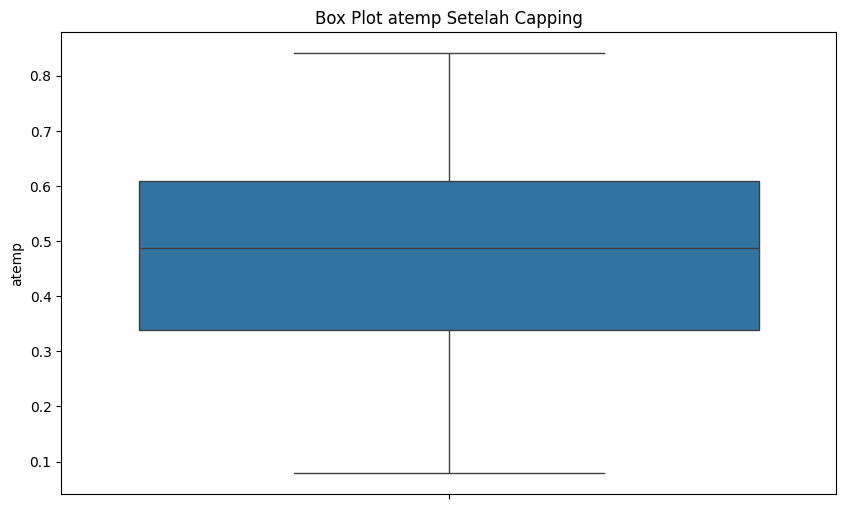

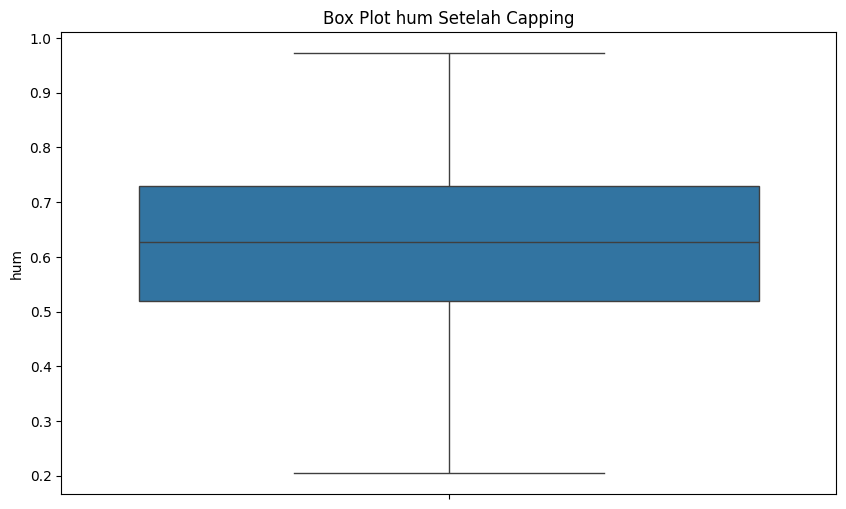

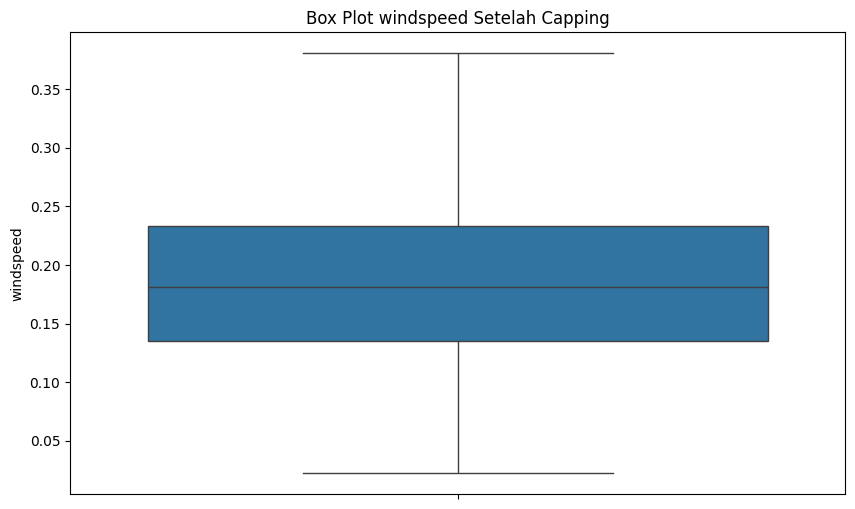

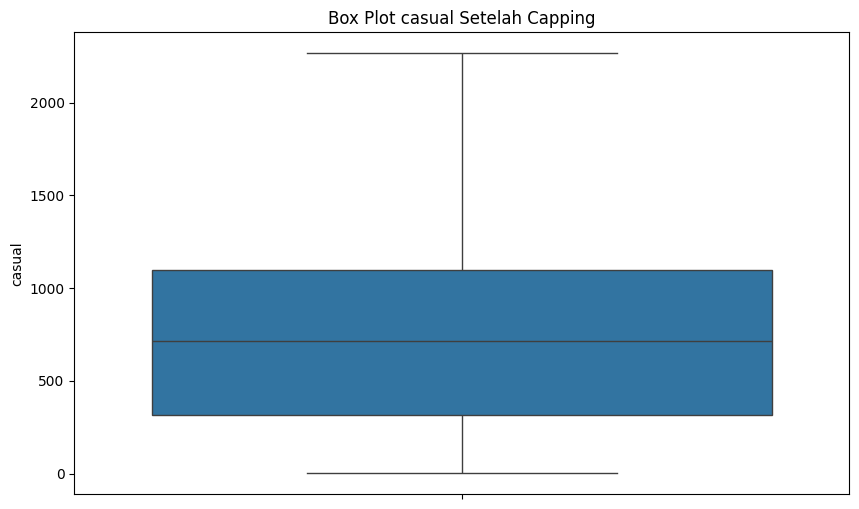

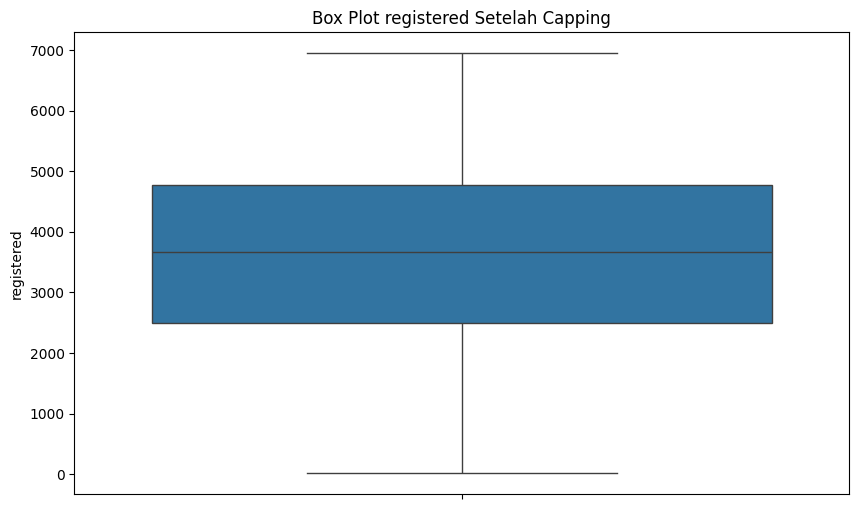

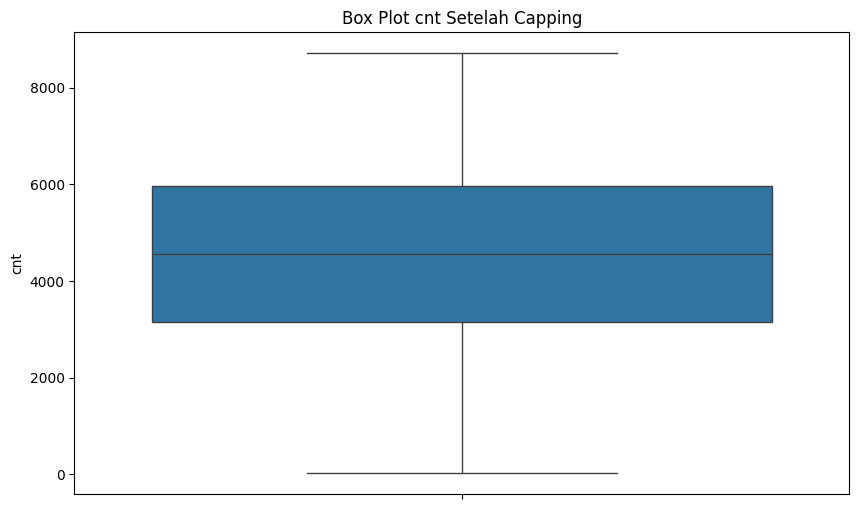

In [33]:
def cap_outliers(df, column):
    if df[column].dtype in [np.float64, np.int64]:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        batas_bawah = Q1 - 1.5 * IQR
        batas_atas = Q3 + 1.5 * IQR
        kond_kurang_dari = df[column] < batas_bawah
        kond_lebih_dari = df[column] > batas_atas
        df[column] = df[column].mask(cond=kond_lebih_dari, other=batas_atas, axis=0)
        df[column] = df[column].mask(cond=kond_kurang_dari, other=batas_bawah, axis=0)
    return df

for column in df_day.columns:
    if df_day[column].dtype in [np.float64, np.int64]:
        df_day = cap_outliers(df_day, column)
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df_day[column])
        plt.title(f'Box Plot {column} Setelah Capping')
        plt.ylabel(column)
        plt.show()

Kode di atas adalah Capping yang di mana berguna untuk membatasi nilai ekstrim pada dataset menjadi batas tertentu. Dapat dilihat keseleuruhan box plot, tidak ada lagi outliers yang tampak. **Alasan dilakukan capping outlier adalah untuk mengurangi nilai ekstrim yang nantinya akan memengaruhi kinerja model apabila dibiarkan. Outlier pada beberapa kolom terhitung cukup banyak sehingga ditakutkan akan memengaruhi model sehingga lebih baik dilakukan capping**

In [34]:
df_day['hum'] = df_day['hum'].replace(0, np.nan)
df_day['hum'] = df_day['hum'].interpolate()

Kode di atas berguna untuk mengisi missing value di kolom hum dengan melakukan interpolasi berdasarkan data poin di sekitarnya. Interpolasi ini adalah linier (default), sehingga missing value diisi dengan perkiraan linier antara data poin sebelumnya dan berikutnya. **Alasan digunakan interpolasi karena dataset ini dapat dikategorikan sebagai data Time Series sehingga metode pengisian missing value dengan interpolasi merupakan pilihan yang tepat**

In [35]:
nilai_nol_hum_d = df_day[df_day['hum'] == 0]
nilai_nol_hum_d

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Dapat dilihat data hum yang bernilai 0 tidak ada lagi pada dataset.

In [36]:
df_day.iloc[68]

instant                        69
dteday        2011-03-10 00:00:00
season                     Spring
yr                           2011
mnth                            3
holiday                   Holiday
weekday                         4
workingday                Weekday
weathersit                  Light
temp                     0.389091
atemp                    0.385668
hum                      0.204687
windspeed                0.261877
casual                       46.0
registered                    577
cnt                           623
Name: 68, dtype: object

Nilai hum dari 0 sudah berubah menjadi 0.204687

In [37]:
df_day.to_csv('data/day_clean.csv', index=False)

#### Cleaning Data (Hour)

In [38]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

Kode di atas digunakan untuk mengubah tipe data dteday menjadi datetime.

In [39]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dapat dilihat tipe data dteday sudah berubah menjadi datetime.

In [40]:
mapping_season_hr = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_hour['season'] = df_hour['season'].map(mapping_season_hr)

mapping_yr_hr = {0: '2011', 1: '2012'}
df_hour['yr'] = df_hour['yr'].map(mapping_yr_hr)

mapping_holiday_hr = {0: 'Holiday', 1: 'Not Holiday'}
df_hour['holiday'] = df_hour['holiday'].map(mapping_holiday_hr)

mapping_workingday_hr = {0: 'Holiday', 1: 'Weekday'}
df_hour['workingday'] = df_hour['workingday'].map(mapping_workingday_hr)

mapping_weathersit_hr = {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}
df_hour['weathersit'] = df_hour['weathersit'].map(mapping_weathersit_hr)

Kode diatas digunakan untuk mapping agar memudahkan para pembaca untuk memahami data.

In [41]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Holiday,6,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Holiday,6,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Holiday,6,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Holiday,6,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Holiday,6,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1


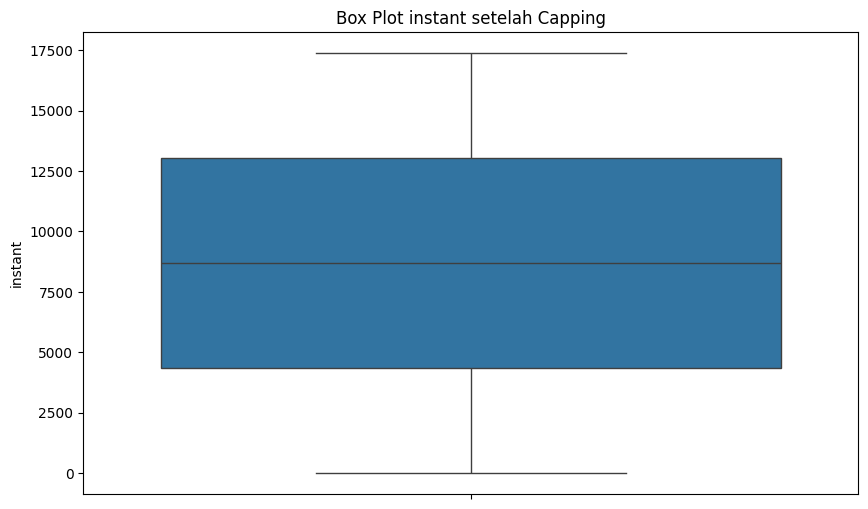

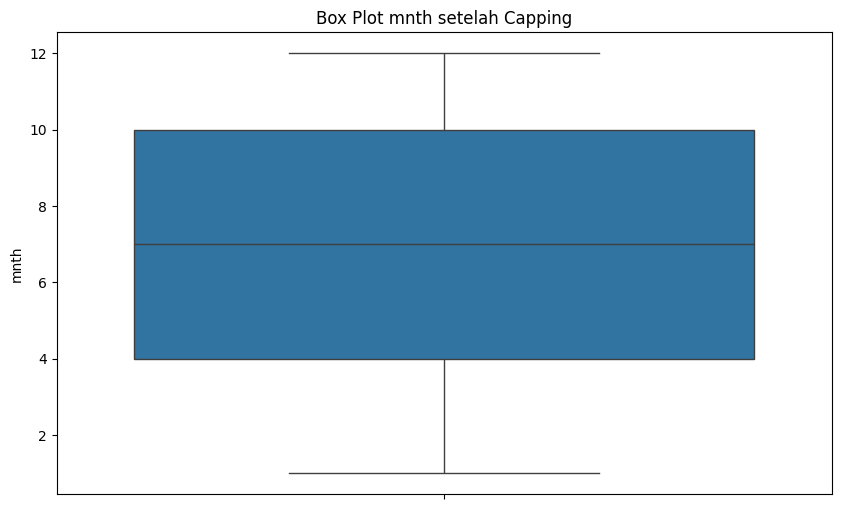

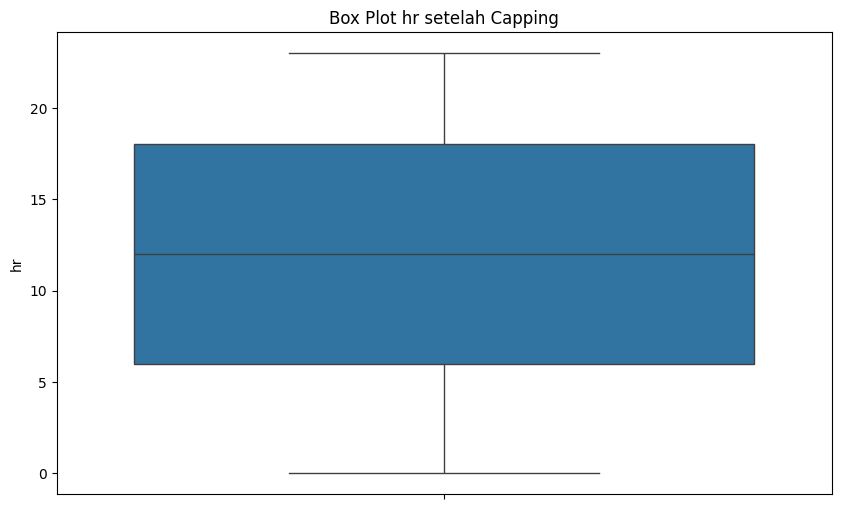

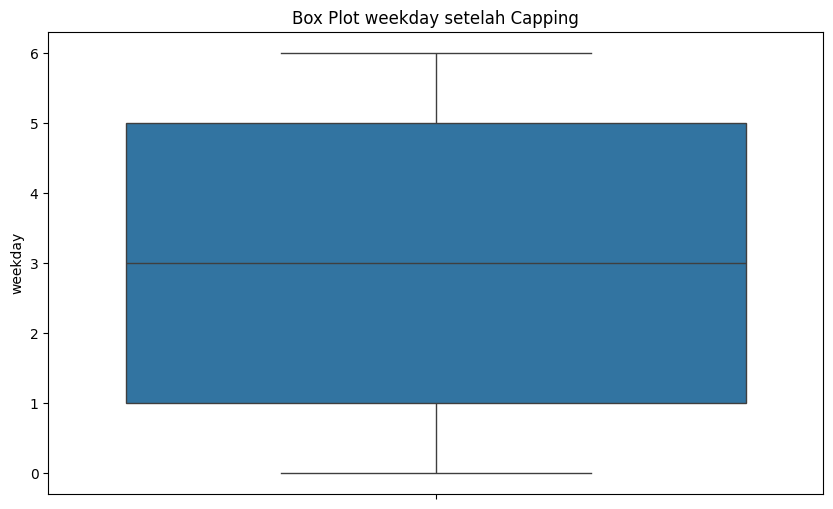

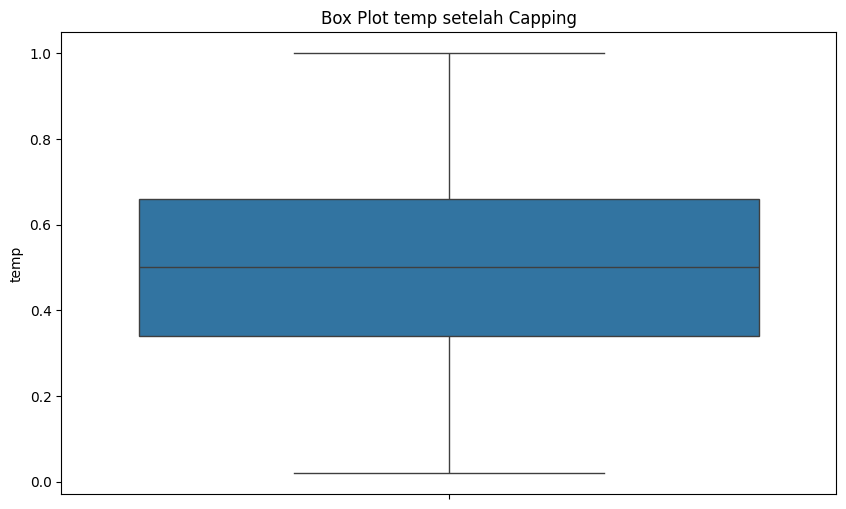

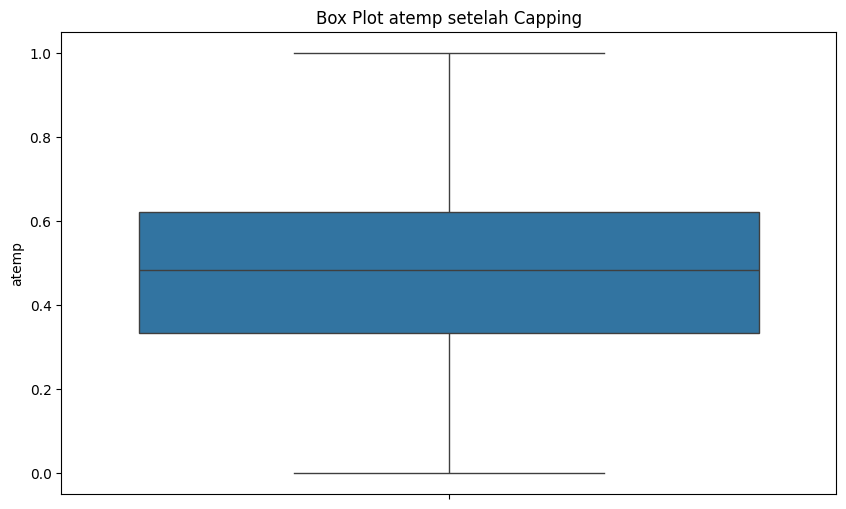

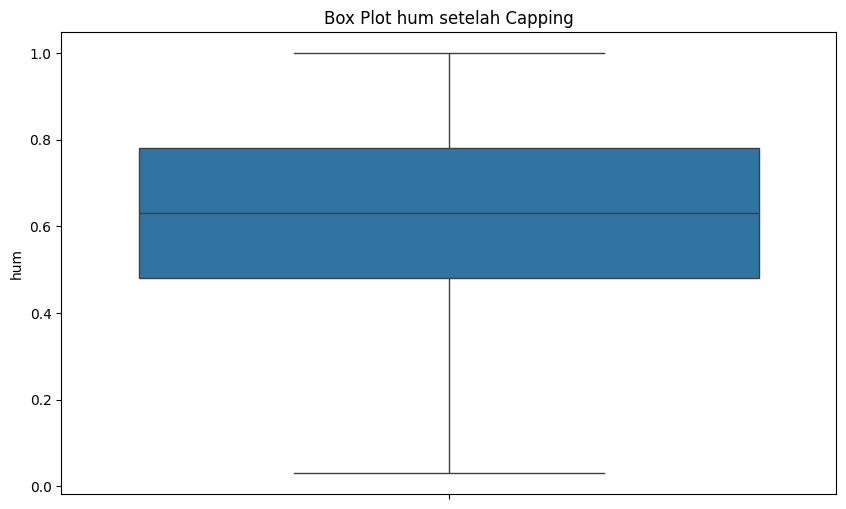

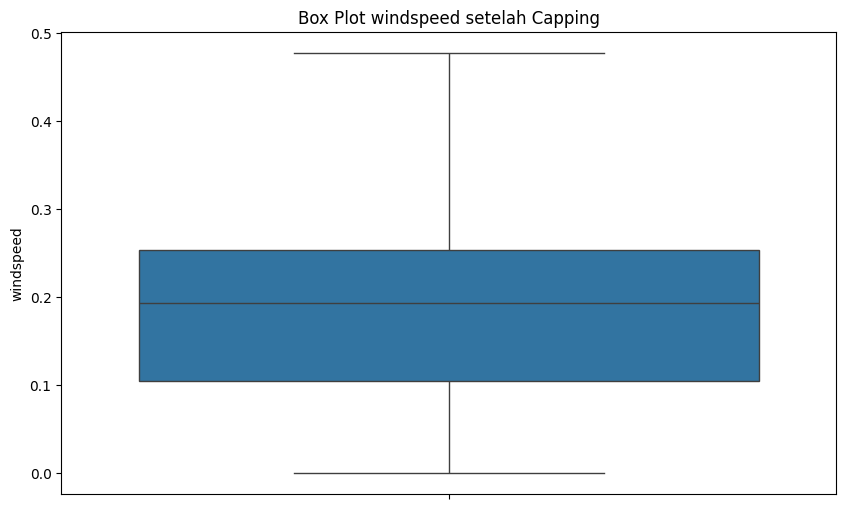

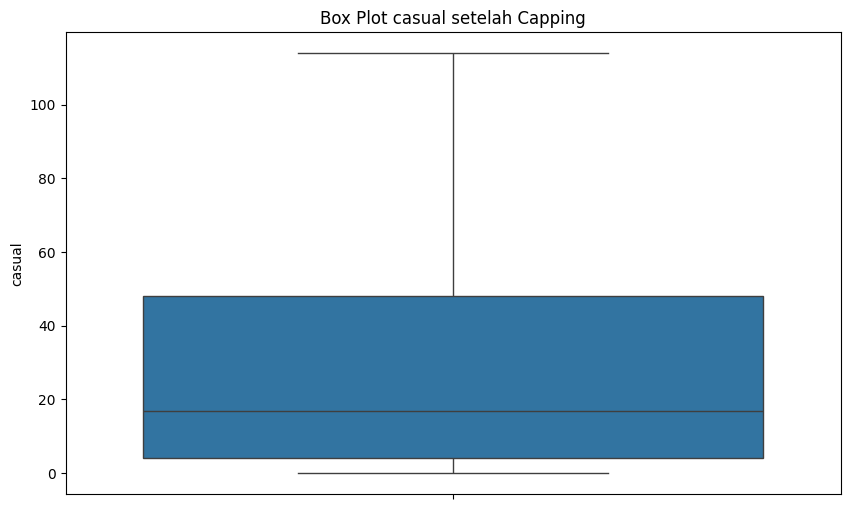

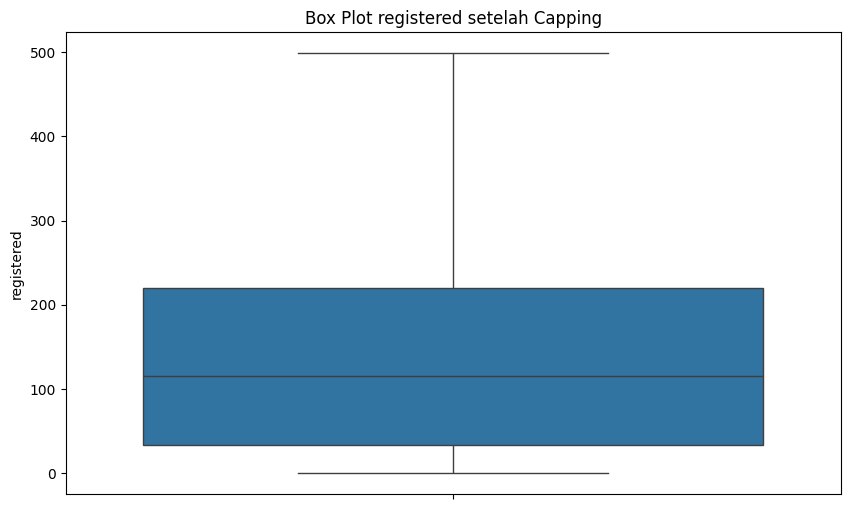

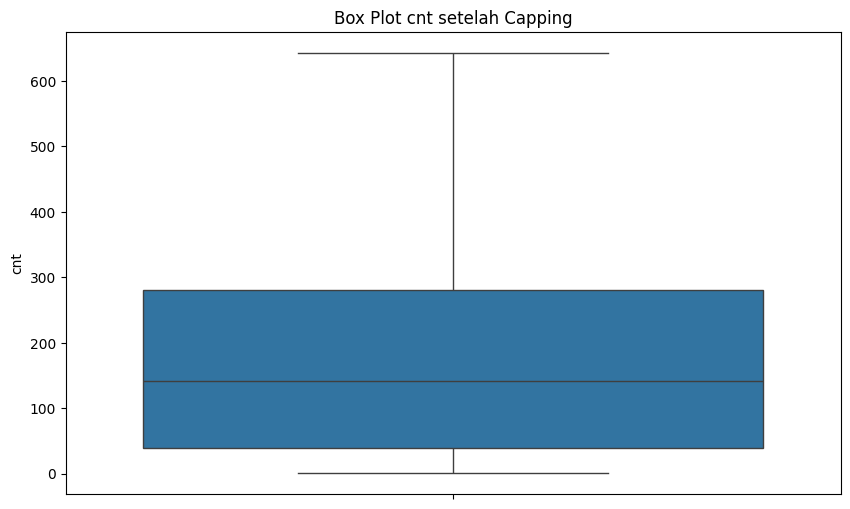

In [42]:
for column in df_hour.columns:
    if df_hour[column].dtype in [np.float64, np.int64]:
        df_hour = cap_outliers(df_hour, column)
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=df_hour[column])
        plt.title(f'Box Plot {column} setelah Capping')
        plt.ylabel(column)
        plt.show()

Pada dataset hour.csv ini juga, dilakukan Capping kembali. Dapat dilihat pada keseluruhan box plot, tidak ada lagi outliers pada setiap kolom.

In [43]:
df_hour['hum'] = df_hour['hum'].replace(0, np.nan)
df_hour['hum'] = df_hour['hum'].interpolate()

In [44]:
df_hour['atemp'] = df_hour['atemp'].replace(0, np.nan)
df_hour['atemp'] = df_hour['atemp'].interpolate()

Sama seperti sebelumnya, dilakukan juga interpolasi untuk hum dan atemp agar tidak ada lagi data yang bernilai 0. **Alasan digunakan interpolasi karena dataset ini dapat dikategorikan sebagai data Time Series sehingga metode pengisian missing value dengan interpolasi merupakan pilihan yang tepat**

In [45]:
nilai_nol_hum_h = df_hour[df_hour['hum'] == 0]
nilai_nol_hum_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [46]:
nilai_nol_atemp_h = df_hour[df_hour['atemp'] == 0]
nilai_nol_atemp_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


Sudah tidak ada lagi data hum dan atemp yang bernilai 0 pada hour.csv.

In [47]:
df_hour.to_csv('data/hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore day.csv

In [48]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731.000000,731,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,NaN,2,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,Holiday,NaN,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,NaN,710,NaN,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,6.519836,NaN,2.997264,NaN,NaN,0.495385,0.474354,0.628197,0.189846,824.388509,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.059130,0.079070,0.204687,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,4.000000,NaN,1.000000,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,7.000000,NaN,3.000000,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,10.000000,NaN,5.000000,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,12.000000,NaN,6.000000,NaN,NaN,0.861667,0.840896,0.972500,0.380611,2266.750000,6946.000000,8714.000000


In [49]:
df_day.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "median", "std"]
})

instant      cnt                                              
       nunique      sum   max   min         mean  median          std
season                                                               
Fall       188  1061129  8714  1115  5644.303191  5353.5  1459.800381
Spring     181   471348  7836   431  2604.132597  2209.0  1399.942119
Summer     184   918589  8362   795  4992.331522  4941.5  1695.977235
Winter     178   841613  8555    22  4728.162921  4634.5  1699.615261

Dari informasi di atas, season Fall yaitu musim gugur merupakan musim dengan sewa sepeda terbanyak dan season Spring yaitu musim semi merupakan musim dengan sewa sepeda paling sedikit.

In [50]:
df_day.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    2049576
2011    1243103
Name: cnt, dtype: int64

Dari informasi di atas, tahun 2012 merupakan tahun dengan sewa sepeda terbanyak dibanding tahun 2011.

In [51]:
df_day.groupby(by="workingday").cnt.sum().sort_values(ascending=False)

workingday
Weekday    2292410
Holiday    1000269
Name: cnt, dtype: int64

Dari informasi diatas orang paling banyak menyewa sepeda di hari kerja dibandingkan di hari libur.

#### Analisis Lanjutan

**Berdasarkan dataset day.csv dan juga hour.csv, teknik analisis lanjutan yang cocok adalah clustering yaitu dengan mengelompokkan data ke dalam grup. RFM dan Geospatial tidak cocok untuk diterapkan di dataset ini karena dataset ini tidak ada kaitan dengan perilaku pembelian begitu juga lokasi geografis**

Manual Clustering/Binning

In [52]:
bins = [0, 0.33, 0.66, 1.0]
kategori = ['Low Temp', 'Medium Temp', 'High Temp']

df_day['temp_category'] = pd.cut(df_day['temp'], bins=bins, labels=kategori, include_lowest=True)

print(df_day[['temp', 'temp_category']].head(10))


       temp temp_category
0  0.344167   Medium Temp
1  0.363478   Medium Temp
2  0.196364      Low Temp
3  0.200000      Low Temp
4  0.226957      Low Temp
5  0.204348      Low Temp
6  0.196522      Low Temp
7  0.165000      Low Temp
8  0.138333      Low Temp
9  0.150833      Low Temp


Kode di atas digunakan untuk mengkategorikan temperatur sebanyak 3 kategori berdasarkan rentang yang ditentukan.

In [53]:
season_kondisi = df_day.groupby(['season', 'weathersit', 'temp_category']).agg({
    'cnt': ['sum', 'mean', 'max', 'min']
}).reset_index()

season_kondisi = season_kondisi[season_kondisi[('cnt', 'sum')] != 0].sort_values(by=('cnt', 'sum'), ascending=False)
season_kondisi

C:\Users\lyona\AppData\Local\Temp\ipykernel_4852\3381742873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_kondisi = df_day.groupby(['season', 'weathersit', 'temp_category']).agg({


season weathersit temp_category     cnt                             
                                        sum         mean     max     min
2     Fall      Clear     High Temp  639826  5712.732143  8173.0  3285.0
19  Summer      Clear   Medium Temp  475155  5724.759036  8294.0  2703.0
28  Winter      Clear   Medium Temp  386591  5444.943662  8555.0  1495.0
34  Winter       Mist   Medium Temp  260850  4742.727273  7852.0  2395.0
25  Summer       Mist   Medium Temp  256012  4414.000000  8362.0  1471.0
8     Fall       Mist     High Temp  178899  5421.181818  7582.0  1115.0
9   Spring      Clear      Low Temp  160473  2198.260274  4270.0   431.0
1     Fall      Clear   Medium Temp  159617  6650.708333  8714.0  4274.0
10  Spring      Clear   Medium Temp  151563  3988.500000  6312.0  1635.0
20  Summer      Clear     High Temp  137570  5502.800000  7498.0  3982.0
27  Winter      Clear      Low Temp  132896  4153.000000  5686.0  2277.0
15  Spring       Mist      Low Temp   86698  1970.409091  3922.0   683.0
7     Fall       Mist   Medium Temp   71780  4785.333333  6869.0  3544.0
16  Spring       Mist   Medium Temp   68875  3130.681818  7836.0   605.0
33  Winter       Mist      Low Temp   41660  4166.000000  5445.0  1096.0
26  Summer       Mist     High Temp   19297  4824.250000  6664.0  3915.0
31  Winter      Light   Medium Temp   18989  2109.888889  4639.0    22.0
18  Summer      Clear      Low Temp   14261  2852.200000  5102.0  2028.0
24  Summer       Mist      Low Temp   12787  2131.166667  3214.0  1536.0
4     Fall      Light   Medium Temp   11007  2751.750000  4459.0  1842.0
12  Spring      Light      Low Temp    3116  1038.666667  2169.0   441.0
22  Summer      Light   Medium Temp    1822   911.000000  1027.0   795.0
21  Summer      Light      Low Temp    1685  1685.000000  1685.0  1685.0
30  Winter      Light      Low Temp     627   627.000000   627.0   627.0
13  Spring      Light   Medium Temp     623   623.000000   623.0   623.0

**Dilakukan clustering/binning pada temp dan dilakukan cross grouping antara season, weathersit, dan temp_category (binning). Hal ini dilakukan agar tahu pada kondisi cuaca dan musim apakah yang banyak menghasilkan sewa sepeda**

Data di atas didapat dengan cara melakukan cross grouping antara kolom season, weathersit, dan temp_categorym untuk mencari jumlah sewa sepeda terbanyak. Data tersebut sudah diurutkan berdasarkan jumlah sum yang terbanyak. Data ini juga hanya menampilkan musim dengan kondisi cuaca tertentu yang menghasilkan sewa sepeda, apabila tidak ada yang menyewa sepeda di musim dan kondisi cuaca tertentu tidak akan ditampilkan. Dari data ini didapat musim Fall (gugur) dengan kondisi cuaca yang clear (cerah) dan suhu yang tinggi menghasilkan jumlah sewa sepeda tertinggi.

### Explore hour.csv

In [54]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2,NaN,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,NaN,NaN,Holiday,NaN,Weekday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734,NaN,NaN,16879,NaN,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,6.537775,11.546752,NaN,3.003683,NaN,NaN,0.496987,0.475778,0.627267,0.188691,31.158812,148.645204,186.361327
min,1.0000,2011-01-01 00:00:00,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,0.020000,0.015200,0.030000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,4.000000,6.000000,NaN,1.000000,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,7.000000,12.000000,NaN,3.000000,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,10.000000,18.000000,NaN,5.000000,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,12.000000,23.000000,NaN,6.000000,NaN,NaN,1.000000,1.000000,1.000000,0.477500,114.000000,499.000000,642.500000


In [55]:
df_hour.groupby(by="hr").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "median", "std"]
})

instant       cnt                                            
   nunique       sum    max   min        mean median         std
hr                                                              
0      726   39130.0  283.0   2.0   53.898072   40.0   42.307910
1      724   24164.0  168.0   1.0   33.375691   20.0   33.538727
2      715   16352.0  132.0   1.0   22.869930   11.0   26.578642
3      697    8174.0   79.0   1.0   11.727403    6.0   13.239190
4      697    4428.0   28.0   1.0    6.352941    6.0    4.143818
5      717   14261.0   66.0   1.0   19.889819   19.0   13.200765
6      725   55132.0  213.0   1.0   76.044138   76.0   55.084348
7      727  154171.0  596.0   1.0  212.064649  208.0  161.441936
8      727  252312.5  642.5   5.0  347.059835  385.0  217.102425
9      727  159438.0  426.0  14.0  219.309491  216.0   93.703458
10     727  126257.0  539.0   8.0  173.668501  147.0  102.205413
11     727  151295.0  642.5  10.0  208.108666  180.0  127.375780
12     728  183573.5  642.5   3.0  252.161401  229.0  141.639818
13     729  183906.5  642.5  11.0  252.272291  224.0  144.106763
14     729  175033.5  642.5  12.0  240.100823  212.0  144.717935
15     729  182524.5  642.5   7.0  250.376543  227.0  142.079087
16     730  227239.0  642.5  11.0  311.286301  304.5  146.942493
17     730  313264.5  642.5  15.0  429.129452  475.0  186.756948
18     728  292179.5  642.5  23.0  401.345467  418.5  187.225391
19     728  226390.0  642.5  11.0  310.975275  309.5  159.827254
20     728  164550.0  567.0  11.0  226.030220  223.5  119.670164
21     728  125445.0  584.0   6.0  172.314560  173.5   89.788893
22     728   95612.0  502.0   9.0  131.335165  129.0   69.937782
23     728   63941.0  256.0   2.0   87.831044   80.0   50.846889

In [56]:
df_hour.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    313264.5
18    292179.5
8     252312.5
16    227239.0
19    226390.0
13    183906.5
12    183573.5
15    182524.5
14    175033.5
20    164550.0
9     159438.0
7     154171.0
11    151295.0
10    126257.0
21    125445.0
22     95612.0
23     63941.0
6      55132.0
0      39130.0
1      24164.0
2      16352.0
5      14261.0
3       8174.0
4       4428.0
Name: cnt, dtype: float64

Dari informasi di atas dapat dilihat bahwa jam 17 atau jam 5 sore merupakan jam dengan sewa sepeda terbanyak.

In [57]:
df_hour.groupby(by="yr").cnt.sum().sort_values(ascending=False)

yr
2012    1995679.0
2011    1243094.5
Name: cnt, dtype: float64

Tahun 2012 merupakan tahun dengan sewa sepeda terbanyak dibandingkan tahun 2011 sama seperti day.csv

In [58]:
df_hour.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
Fall      1036361.0
Summer     906001.0
Winter     826386.0
Spring     470025.5
Name: cnt, dtype: float64

Sama seperti day.csv, season 3 yaitu musim gugur juga merupakan musim dengan sewa sepeda terbanyak.

#### Analisis Lanjutan

Manual Clustering/Binning

In [59]:
bins = [0, 0.33, 0.66, 1.0]
kategori = ['Low Temp', 'Medium Temp', 'High Temp']

df_hour['temp_category'] = pd.cut(df_hour['temp'], bins=bins, labels=kategori, include_lowest=True)

print(df_hour[['temp', 'temp_category']].head(10))


   temp temp_category
0  0.24      Low Temp
1  0.22      Low Temp
2  0.22      Low Temp
3  0.24      Low Temp
4  0.24      Low Temp
5  0.24      Low Temp
6  0.22      Low Temp
7  0.20      Low Temp
8  0.24      Low Temp
9  0.32      Low Temp


In [60]:
season_kondisi_hr = df_hour.groupby(['season', 'weathersit', 'temp_category']).agg({
    'cnt': ['sum', 'mean', 'max', 'min']
}).reset_index()

season_kondisi_hr = season_kondisi_hr[season_kondisi_hr[('cnt', 'sum')] != 0].sort_values(by=('cnt', 'sum'), ascending=False)
season_kondisi_hr

C:\Users\lyona\AppData\Local\Temp\ipykernel_4852\1561717772.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_kondisi_hr = df_hour.groupby(['season', 'weathersit', 'temp_category']).agg({


season weathersit temp_category       cnt                          
                                          sum        mean    max    min
2     Fall      Clear     High Temp  629125.0  280.859375  642.5    2.0
25  Summer      Clear   Medium Temp  428059.5  206.194364  642.5    1.0
37  Winter      Clear   Medium Temp  421754.5  235.222811  642.5    1.0
26  Summer      Clear     High Temp  210560.5  341.264992  642.5    3.0
46  Winter       Mist   Medium Temp  201559.5  208.437952  642.5    1.0
13  Spring      Clear   Medium Temp  178658.0  189.859724  642.5    1.0
34  Summer       Mist   Medium Temp  156927.5  173.209161  642.5    1.0
1     Fall      Clear   Medium Temp  152506.0  146.640385  642.5    1.0
12  Spring      Clear      Low Temp  139084.0   81.383265  576.0    1.0
11    Fall       Mist     High Temp  134714.0  261.073643  642.5    3.0
36  Winter      Clear      Low Temp   92565.5  121.000654  642.5    1.0
10    Fall       Mist   Medium Temp   74651.5  173.205336  642.5    2.0
21  Spring       Mist      Low Temp   68395.0   85.387016  530.0    1.0
22  Spring       Mist   Medium Temp   55308.0  137.582090  642.5    1.0
35  Summer       Mist     High Temp   40949.0  288.373239  642.5    2.0
43  Winter      Light   Medium Temp   39705.0  122.546296  642.5    1.0
31  Summer      Light   Medium Temp   37918.5  117.759317  642.5    1.0
45  Winter       Mist      Low Temp   37279.5  147.934524  642.5    1.0
8     Fall      Light     High Temp   24032.0  258.408602  642.5    5.0
7     Fall      Light   Medium Temp   21332.5  121.207386  642.5    1.0
38  Winter      Clear     High Temp   21075.0  413.235294  642.5  154.0
24  Summer      Clear      Low Temp   14993.0   90.319277  624.0    1.0
19  Spring      Light   Medium Temp   11330.0   74.539474  520.0    1.0
18  Spring      Light      Low Temp   10312.0   47.520737  387.0    1.0
47  Winter       Mist     High Temp    8859.0  305.482759  478.0  151.0
33  Summer       Mist      Low Temp    7888.0   82.166667  482.0    1.0
14  Spring      Clear     High Temp    6284.5  418.966667  642.5  204.0
32  Summer      Light     High Temp    5065.0  266.578947  552.0   23.0
30  Summer      Light      Low Temp    3640.0   56.000000  379.0    1.0
42  Winter      Light      Low Temp    3588.0   70.352941  500.0    1.0
23  Spring       Mist     High Temp     431.0  215.500000  258.0  173.0
15  Spring      Heavy      Low Temp     223.0   74.333333  164.0   23.0

Dari data ini didapat musim Fall (gugur) dengan kondisi cuaca yang clear (cerah) dan suhu yang tinggi menghasilkan jumlah sewa sepeda tertinggi.

### Explore merged_df

In [61]:
df_day_clean = pd.read_csv('data/day_clean.csv')
df_hour_clean = pd.read_csv('data/hour_clean.csv')
merged_df = pd.merge(df_day_clean, df_hour_clean, on="dteday", suffixes=('_day', '_hour'))
merged_df.head()

,instant_day,dteday,season_day,yr_day,mnth_day,holiday_day,weekday_day,workingday_day,weathersit_day,temp_day,...,weekday_hour,workingday_hour,weathersit_hour,temp_hour,atemp_hour,hum_hour,windspeed_hour,casual_hour,registered_hour,cnt_hour
0,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,...,6,Holiday,Clear,0.24,0.2879,0.81,0.0,3,13,16.0
1,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,...,6,Holiday,Clear,0.22,0.2727,0.80,0.0,8,32,40.0
2,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,...,6,Holiday,Clear,0.22,0.2727,0.80,0.0,5,27,32.0
3,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,...,6,Holiday,Clear,0.24,0.2879,0.75,0.0,3,10,13.0
4,1,2011-01-01,Spring,2011,1,Holiday,6,Holiday,Mist,0.344167,...,6,Holiday,Clear,0.24,0.2879,0.75,0.0,0,1,1.0


In [62]:
merged_df_by_wdhr = merged_df.groupby(by=["weekday_day", "hr"]).agg({
    "cnt_day": "sum",
    "cnt_hour": "sum"
})
merged_df_by_wdhr.sort_values(by=["cnt_day", "cnt_hour"], ascending=False)

cnt_day  cnt_hour
weekday_day hr                   
5           17   487790   47687.5
            8    487790   46462.0
            18   487790   42581.0
            16   487790   34423.0
            19   487790   31371.5
...                 ...       ...
0           6    438597    1493.0
            4    437953     955.0
1           3    433083     496.0
0           2    432365    6286.0
            5    430791     852.0

[168 rows x 2 columns]

Untuk eksplor lebih lanjut, digabungkan kedua dataset ini. Sewa sepeda terbanyak dalam satu harinya, yaitu Weekday 5 (Jum'at) pada jam 5.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim (season) manakah yang paling banyak pengguna menyewa sepeda? Dan di hari manakah (working day) biasanya ramai pengguna menyewa sepeda

<Figure size 1400x800 with 0 Axes>

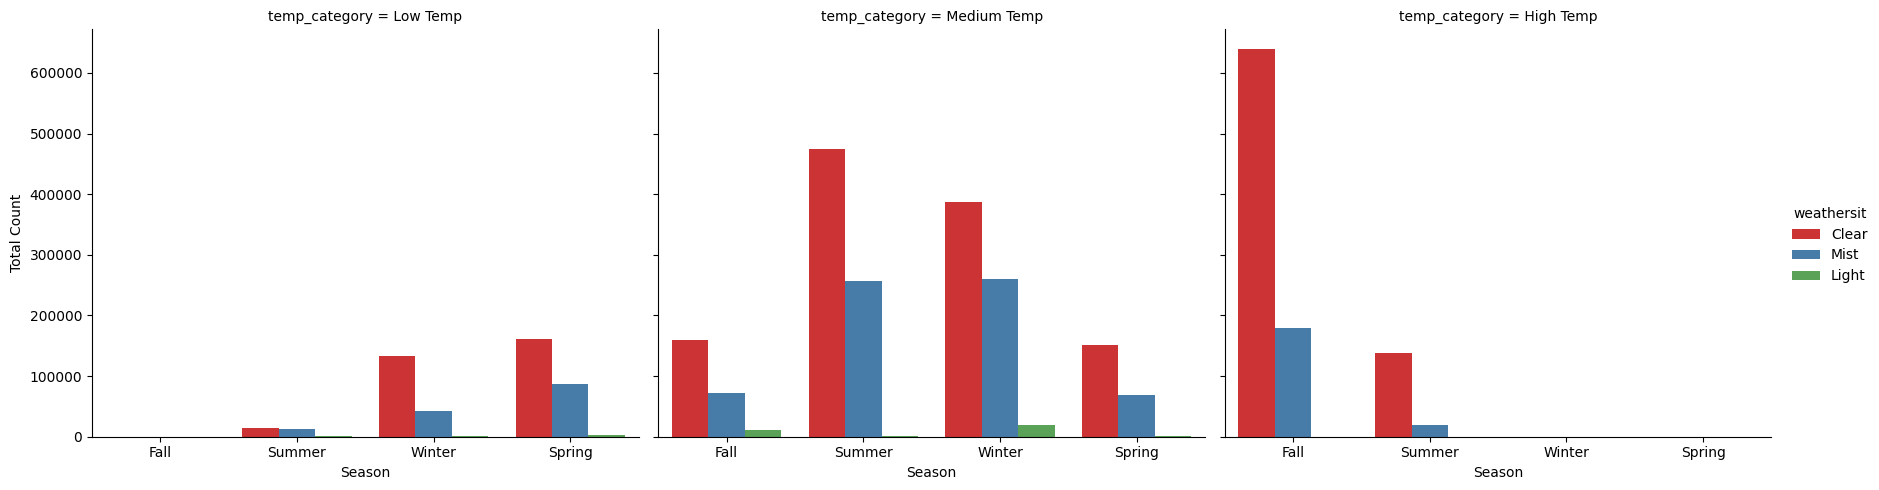

In [79]:
plt.figure(figsize=(14, 8))
g = sns.catplot(data=season_kondisi, kind='bar', x='season', y=('cnt', 'sum'), hue='weathersit', col='temp_category', errorbar=None, height=5, aspect=1.2, palette='Set1')
g.set_axis_labels("Season", "Total Count")
plt.show()

Dari chart di atas, musim Fall dengan suhu tinggi dan cuaca cerah menghasilkan sewa sepeda terbanyak

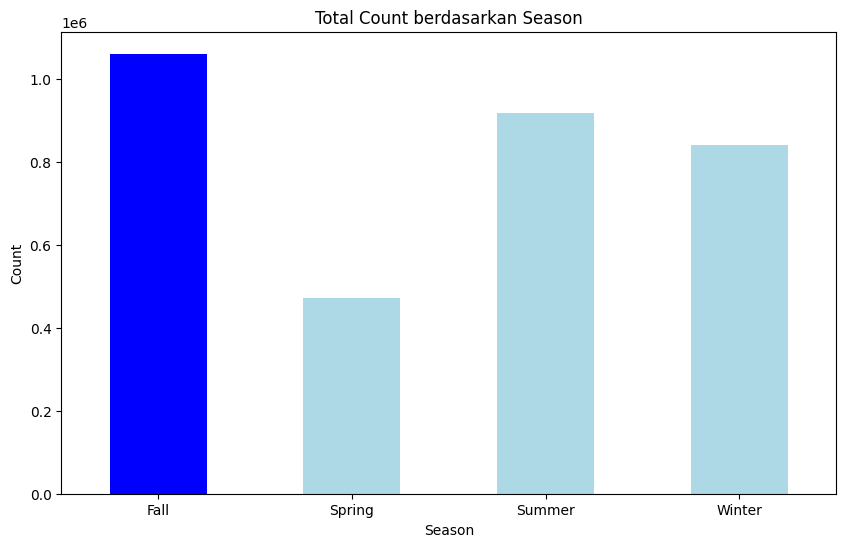

In [ ]:
plt.figure(figsize=(10, 6))
counts = df_day.groupby('season')['cnt'].sum()
colors = ['lightblue' if count != counts.max() else 'blue' for count in counts]
counts.plot(kind='bar', color=colors)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Total Count berdasarkan Season')
plt.xticks(rotation=0)
plt.show()

Dari chart di atas, musim Fall menghasilkan sewa sepeda terbanyak

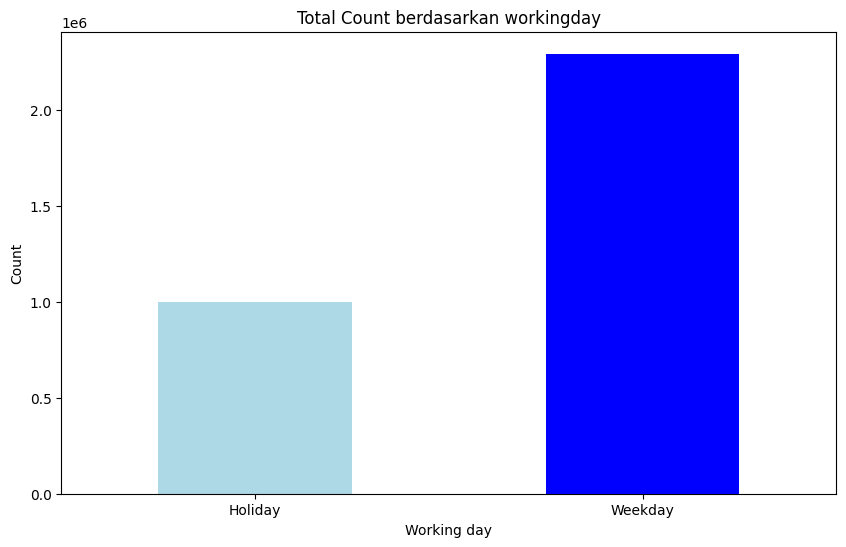

In [72]:
plt.figure(figsize=(10, 6))
cnts = df_day.groupby('workingday')['cnt'].sum()
clr = ['lightblue' if cnt != cnts.max() else 'blue' for cnt in cnts]
cnts.plot(kind='bar', color=clr)
plt.xlabel('Working day')
plt.ylabel('Count')
plt.title('Total Count berdasarkan workingday')
plt.xticks(rotation=0)
plt.show()

Dari chart di atas, Weekday menghasilkan sewa sepeda terbanyak

### Pertanyaan 2: Bagaimana performa total pengguna (cnt) dari tahun 2011 sampai 2012?

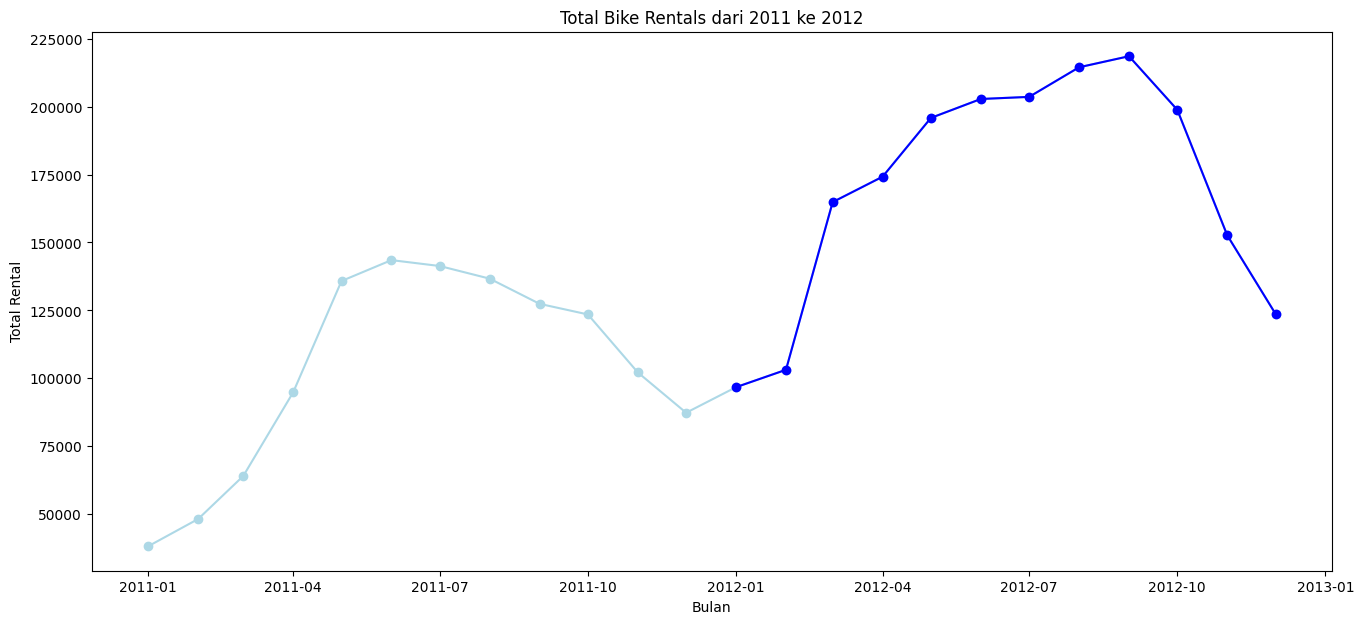

In [70]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
rental_bulanan = df_day.groupby(df_day['dteday'].dt.to_period('M'))['cnt'].sum()

plt.figure(figsize=(16, 7))
plt.plot(rental_bulanan.index.to_timestamp(), rental_bulanan, marker='o', color='lightblue')
start_2012 = rental_bulanan.index >= '2012-01'
plt.plot(rental_bulanan.index.to_timestamp()[start_2012], rental_bulanan[start_2012], marker='o', color='blue')
plt.xlabel('Bulan')
plt.ylabel('Total Rental')
plt.title('Total Bike Rentals dari 2011 ke 2012')
plt.show()

## Conclusion

- Conclusion pertanyaan 1

Dari bar chart yang ditampilkan, musim (season) fall (gugur) merupakan musim dengan paling banyak sewa sepeda dan musim spring (semi) dengan paling sedikit sewa sepeda. Orang-orang banyak menyewa sepeda di suhu yang tinggi dan juga cuaca yang cerah. Selain itu, ternyata para pengguna banyak menyewa sepeda pada waktu kerja dibandingkan dengan waktu libur ataupun weekend.  

- Conclusion pertanyaan 2

Dari line chart yang ditampilkan, total sewa sepeda terbanyak berada di September 2012 (2012-9). Selain itu, dapat disimpulkan bahwa jumlah sewa sepeda tahun 2012 mengalami peningkatan dibandingkan tahun 2011.